# Classifying blobs
Scikit learn classification on test data based on https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/


In [1]:
#todo add metrics for different classifiers, with plots of results
#todo: add normalisation of data

In [2]:
import sklearn
import sklearn.neighbors
import sklearn.preprocessing
import sklearn.ensemble
import sklearn.model_selection
import sklearn.neural_network
import sklearn.metrics
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
from pandas import DataFrame
import numpy

In [3]:
cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
colors = {0: 'red', 1: 'blue', 2: 'green'}
num_blobs = 3
num_features = 2
cluster_std = 3.0
grid_size = 25

In [22]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=400, centers=num_blobs, n_features=num_features, cluster_std=cluster_std)

In [23]:
val_ranges=[(min(X[:,ix1]), max(X[:,ix1])) for ix1 in range(0,X.shape[1])]
grid_x, grid_y = numpy.meshgrid( numpy.arange(val_ranges[0][0], val_ranges[0][1], (val_ranges[0][1] - val_ranges[0][0]) / grid_size),
               numpy.arange(val_ranges[1][0], val_ranges[1][1], (val_ranges[1][1] - val_ranges[1][0]) / grid_size))
grid_x = grid_x.flatten()
grid_y = grid_y.flatten()
X_grid = numpy.concatenate([grid_x.reshape(grid_x.shape[0],1), grid_y.reshape(grid_y.shape[0],1)], axis=1)

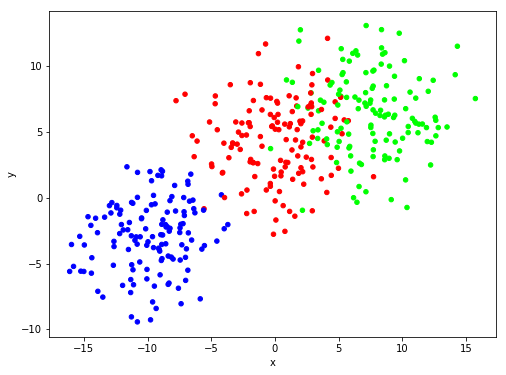

In [24]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:, 0], y=X[:, 1], label=y))

fig1 = pyplot.figure('blobs', figsize=(8,6))
ax1 = fig1.add_subplot(111)
_ = df.plot(ax=ax1,kind='scatter',x='x',y='y',c='label',cmap=cmap_bold,colorbar=False)


In [25]:
(X_train, X_test,
 y_train, y_test) = sklearn.model_selection.train_test_split(
    X, y, test_size=0.2)
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
df_train = DataFrame(dict(x=X_train[:, 0], y=X_train[:, 1], label=y_train))
df_train_scale = DataFrame(dict(x=X_train_scale[:, 0], y=X_train_scale[:, 1], label=y_train))
df_test = DataFrame(dict(x=X_test[:, 0], y=X_test[:, 1], label=y_test))
df_test_scale = DataFrame(dict(x=X_test_scale[:, 0], y=X_test_scale[:, 1], label=y_test))

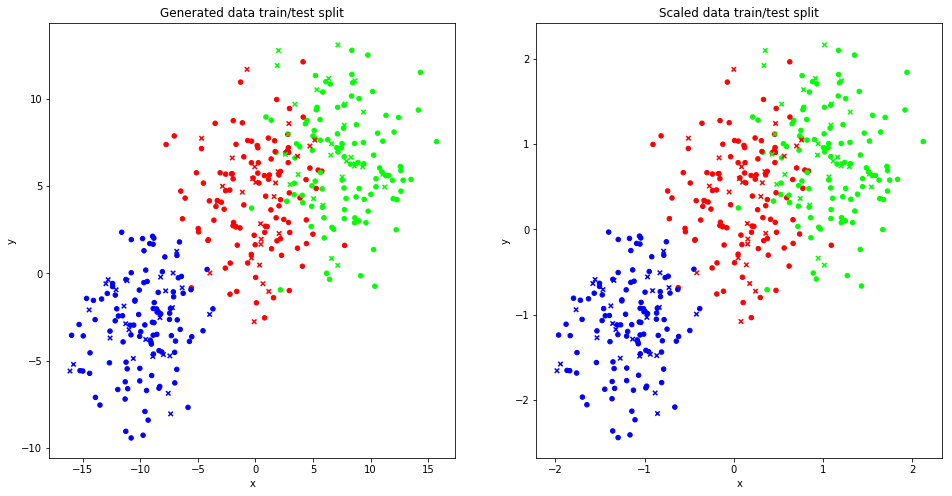

In [26]:
fig1 = pyplot.figure('blob_splits', figsize=(16,8))
ax1 = fig1.add_subplot(121,title='Generated data train/test split')
df_train.plot(ax=ax1,kind='scatter', x='x',y='y',c='label',cmap=cmap_bold, colorbar=False)
df_test.plot(ax=ax1,kind='scatter', x='x',y='y',c='label',cmap=cmap_bold, colorbar=False, marker='x')
ax1 = fig1.add_subplot(122, title='Scaled data train/test split')
df_train_scale.plot(ax=ax1,kind='scatter', x='x',y='y',c='label',cmap=cmap_bold, colorbar=False)
df_test_scale.plot(ax=ax1,kind='scatter', x='x',y='y',c='label',cmap=cmap_bold, colorbar=False, marker='x')

In [27]:
def do_result_plot(train_data, test_data, result_data, grid_data, algorithm_name):
    fig_result = pyplot.figure(f'train/test/result {algorithm_name}', figsize=(16,16))
    ax_result_1 = fig_result.add_subplot(221, title=f'train and test labels {algorithm_name}')
    _ = train_data.plot(ax=ax_result_1,kind='scatter', x='x',y='y',c='label',cmap=cmap_bold, colorbar=False)
    _ = test_data.plot(ax=ax_result_1,kind='scatter', x='x',y='y',c='label',cmap=cmap_bold,marker='x', colorbar=False)
    ax_result_2 = fig_result.add_subplot(222, title=f'train and result labels {algorithm_name}')#
    _ = train_data.plot(ax=ax_result_2, kind='scatter', x='x',y='y',c='label',cmap=cmap_bold, colorbar=False)
    _ = result_data.plot(ax=ax_result_2,kind='scatter', x='x',y='y',c='label',cmap=cmap_bold,marker='x', colorbar=False)
    ax_result_3 = fig_result.add_subplot(223, title=f'test points with incorrect result labels {algorithm_name}')#
    _ = test_data[test_data.label == result_data.label].plot(ax=ax_result_3,kind='scatter',x='x',y='y',c='grey',colorbar=False,marker='x',vmin=0,vmax=2)
    _ = test_data[test_data.label != result_data.label].plot(ax=ax_result_3,kind='scatter',x='x',y='y',c='label',cmap=cmap_bold,colorbar=False,marker='x',vmin=0,vmax=2)    
    ax_result_4 = fig_result.add_subplot(224, title=f'result space grid {algorithm_name}')#
    grid_data.plot(ax=ax_result_4,kind='scatter', x='x',y='y',c='label',cmap=cmap_bold, colorbar=False)

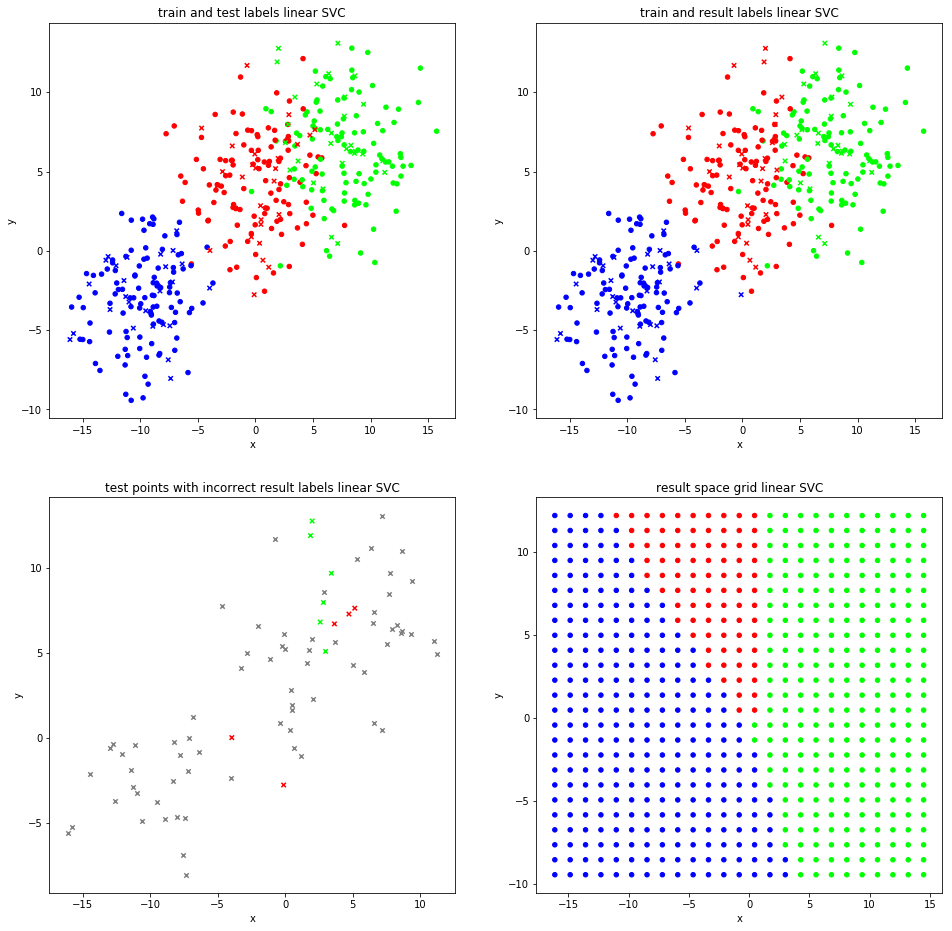

In [38]:
clf_lin_svc = sklearn.svm.LinearSVC(max_iter=5000,tol=1e-2)
clf_lin_svc.fit(X_train_scale, y_train)
y_res_train_svc = clf_lin_svc.predict(X_train_scale)
df_res_train_svc = DataFrame(dict(x=X_test[:, 0], y=X_test[:, 1], label=y_result_svc))
y_res_test_svc = clf_lin_svc.predict(X_test_scale)
df_res_test_svc = DataFrame(dict(x=X_test[:, 0], y=X_test[:, 1], label=y_result_svc))
grid_result_svc = clf_lin_svc.predict(X_grid)
df_grid_svc = DataFrame(dict(x=X_grid[:, 0], y=X_grid[:, 1], label=grid_result_svc))
do_result_plot(df_train, df_test, df_result_svc, df_grid_svc, 'linear SVC')

In [41]:
sklearn.metrics.f1_score(y_train, y_res_train_svc,average=None)

array([0.86138614, 0.98165138, 0.89090909])

In [42]:
sklearn.metrics.f1_score(y_test, y_res_test_svc,average=None)

array([0.79245283, 0.96296296, 0.83018868])

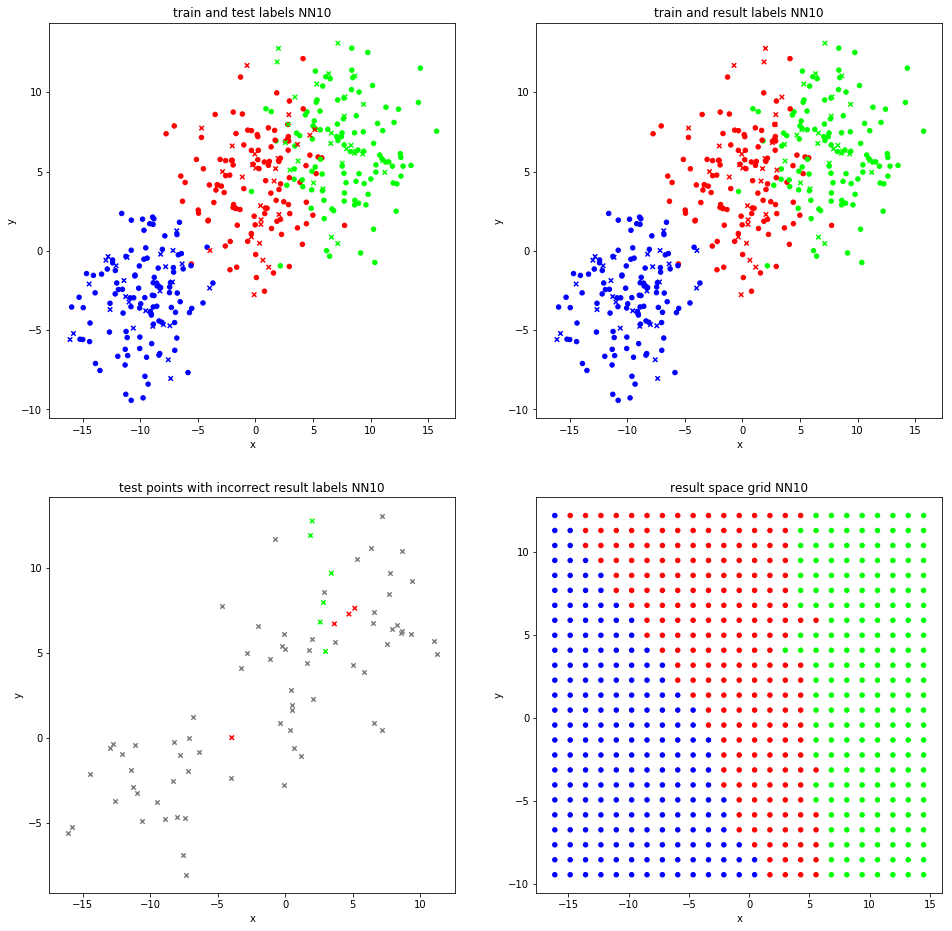

In [29]:
n_neighbours = 10
weights = 'distance'
clf_nn10 = sklearn.neighbors.KNeighborsClassifier(n_neighbours, weights=weights)
clf_nn10.fit(X_train, y_train)
y_result_nn10 = clf_nn10.predict(X_test)
df_result_nn10 = DataFrame(dict(x=X_test[:, 0], y=X_test[:, 1], label=y_result_nn10))
grid_result_nn10 = clf_nn10.predict(X_grid)
df_grid_nn10 = DataFrame(dict(x=X_grid[:, 0], y=X_grid[:, 1], label=grid_result_nn10))
do_result_plot(df_train, df_test, df_result_nn10, df_grid_nn10, 'NN10')

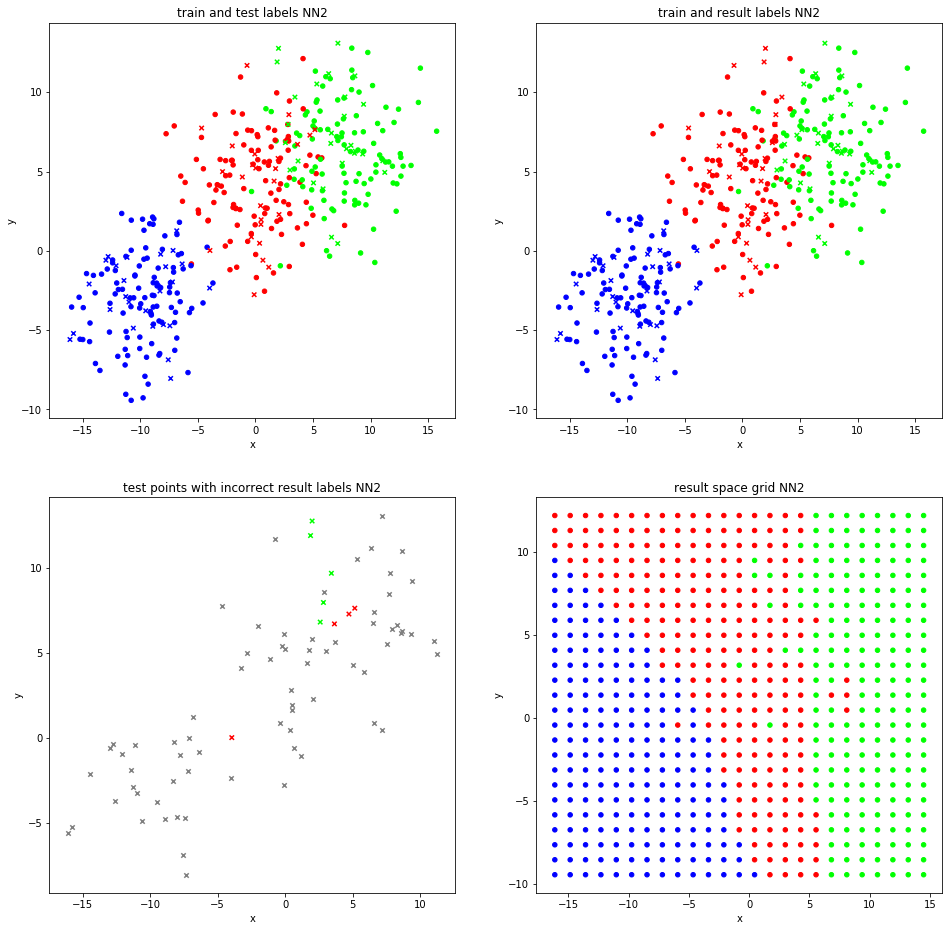

In [30]:
clf_nn2 = sklearn.neighbors.KNeighborsClassifier(2, weights=weights)
clf_nn2.fit(X_train, y_train)
y_result_nn2 = clf_nn2.predict(X_test)
df_result_nn2 = DataFrame(dict(x=X_test[:, 0], y=X_test[:, 1], label=y_result_nn2))
grid_result_nn2 = clf_nn2.predict(X_grid)
df_grid_nn2 = DataFrame(dict(x=X_grid[:, 0], y=X_grid[:, 1], label=grid_result_nn2))
do_result_plot(df_train, df_test, df_result_nn2, df_grid_nn2, 'NN2')

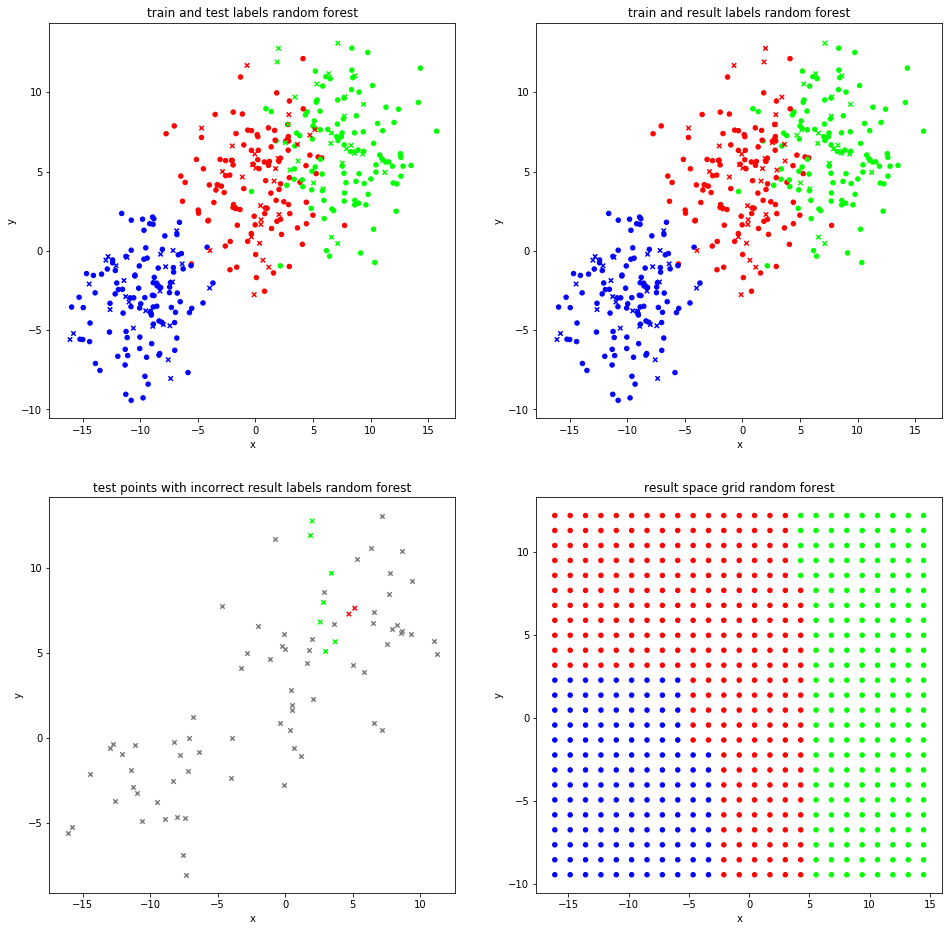

In [31]:
clf_rf = sklearn.ensemble.RandomForestClassifier(n_estimators=10, max_depth=3,random_state=0)
clf_rf.fit(X_train, y_train)
y_result_rf = clf_rf.predict(X_test)
df_result_rf = DataFrame(dict(x=X_test[:,0], y=X_test[:,1], label=y_result_rf))
grid_result_rf = clf_rf.predict(X_grid)
df_grid_rf = DataFrame(dict(x=X_grid[:, 0], y=X_grid[:, 1], label=grid_result_rf))
do_result_plot(df_train, df_test, df_result_rf, df_grid_rf, 'random forest')

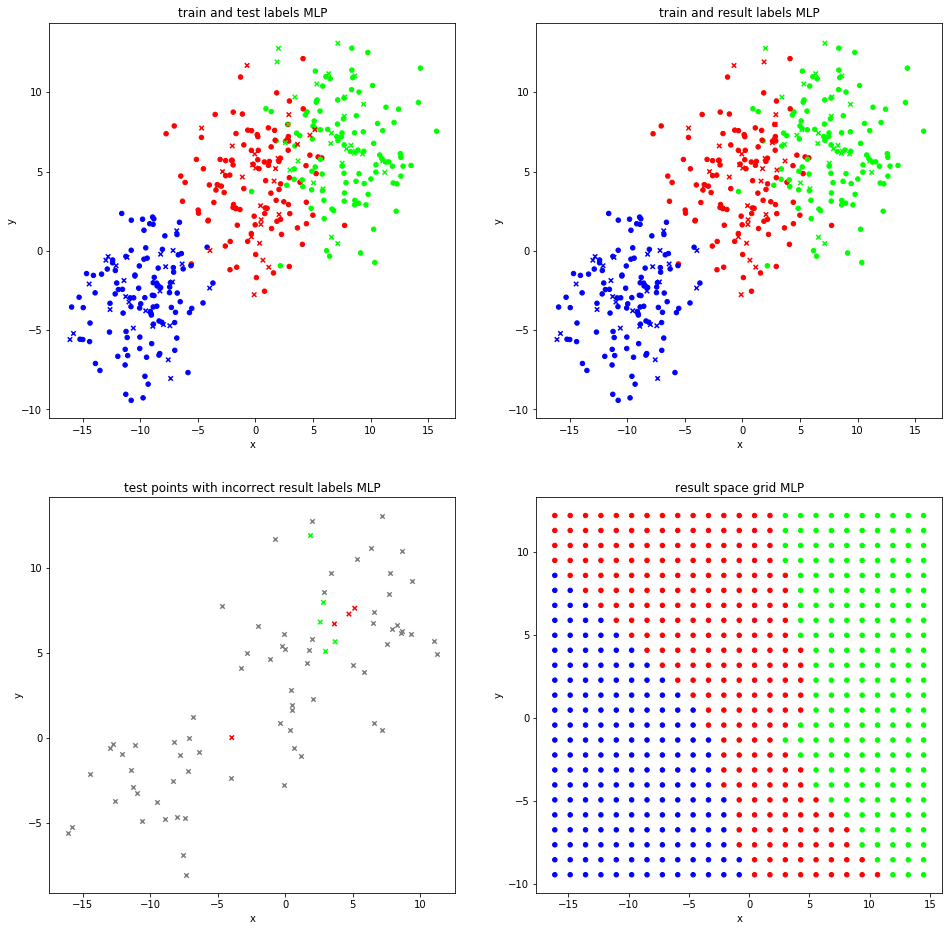

In [34]:
param_mlp = {'alpha': 1e-5,
        'hidden_layer_sizes': (5, 3),
        'random_state': 1,
            'solver':'lbfgs',
            'max_iter': 300}
clf_mlp = sklearn.neural_network.MLPClassifier(**param_mlp)
clf_mlp.fit(X_train_scale, y_train)
y_result_mlp = clf_mlp.predict(X_test_scale)
df_result_mlp = DataFrame(dict(x=X_test[:,0], y=X_test[:,1], label=y_result_mlp))
grid_result_mlp = clf_mlp.predict(scaler.transform(X_grid))
df_grid_mlp = DataFrame(dict(x=X_grid[:, 0], y=X_grid[:, 1], label=grid_result_mlp))
do_result_plot(df_train, df_test, df_result_mlp, df_grid_mlp, 'MLP')

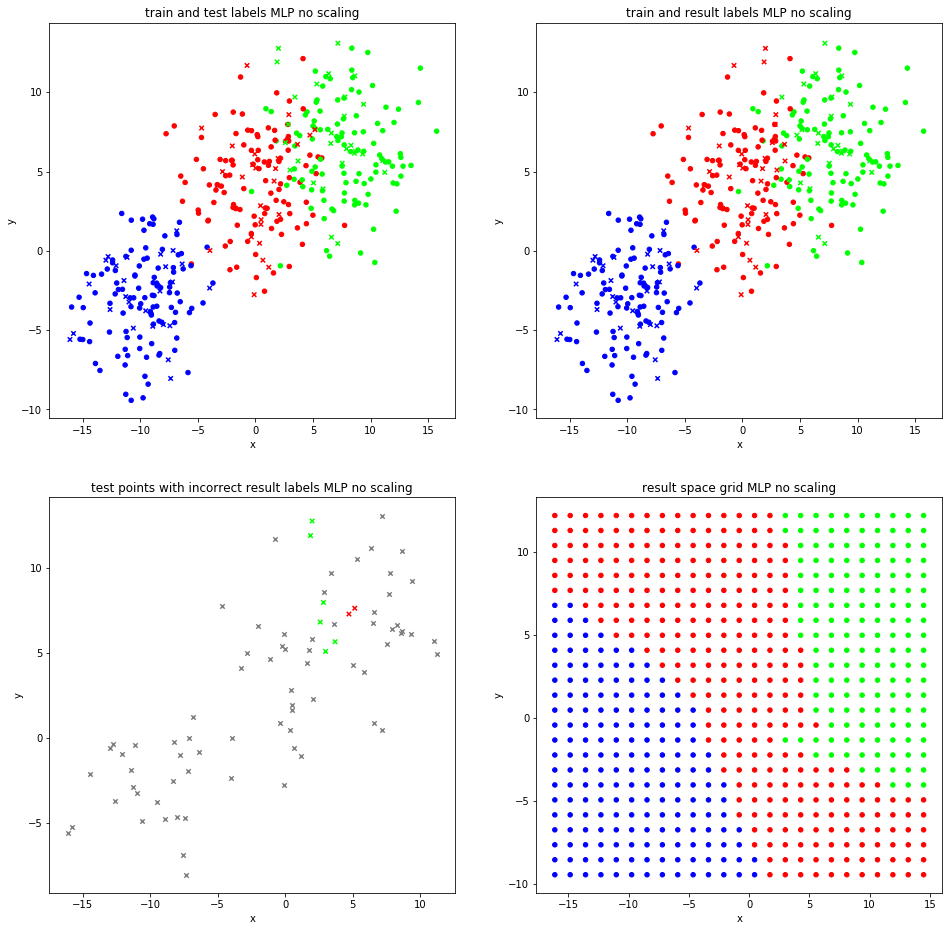

In [35]:
clf_mlp_noscale = sklearn.neural_network.MLPClassifier(**param_mlp)
clf_mlp.fit(X_train, y_train)
y_result_mlp = clf_mlp.predict(X_test)
df_result_mlp = DataFrame(dict(x=X_test[:,0], y=X_test[:,1], label=y_result_mlp))
grid_result_mlp = clf_mlp.predict(X_grid)
df_grid_mlp = DataFrame(dict(x=X_grid[:, 0], y=X_grid[:, 1], label=grid_result_mlp))
do_result_plot(df_train, df_test, df_result_mlp, df_grid_mlp, 'MLP no scaling')

In [ ]:
sklearn.metrics.f1_score(y_train,)